<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/SMABacktester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generalization with OOP: The SMABacktester Class

## Building the SMABacktester Class from scratch: Instantiation

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None

In [ ]:
tester = SMABacktester("AMZN", 50, 200, "2008-01-01", "2020-06-30")

In [ ]:
tester.symbol

'AMZN'

In [ ]:
tester.SMA_L

200

In [ ]:
tester.results

## Method get_data()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import datetime as dt
import yfinance as yf
import pandas as pd
%pip install yfinance

In [ ]:

stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
start = dt.datetime.today()-dt.timedelta(6000)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in stocks:
    ohlcv_data[ticker] = yf.download(ticker,start,end)

raw = cl_price
raw

In [ ]:
raw = raw["AMZN"].to_frame().dropna() # selecting an instrument
raw

In [ ]:
raw = raw.loc["2010-01-01":"2012-12-31"].copy() # setting time period 
raw

In [ ]:
raw.rename(columns={"AMZN": "price"}, inplace=True) # clean up

In [ ]:
raw

In [ ]:
raw["returns"] = np.log(raw / raw.shift(1)) # calculate log returns

In [ ]:
raw["SMA_S"] = raw["price"].rolling(50).mean() # add short sma
raw["SMA_L"] = raw["price"].rolling(200).mean() # add long sma

In [ ]:
raw

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
        start = dt.datetime.today()-dt.timedelta(6000)
        end = dt.datetime.today()
        cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
        ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

        # looping over tickers and creating a dataframe with close prices
        for ticker in stocks:
            cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
            

        # looping over tickers and storing OHLCV dataframe in dictionary
        for ticker in stocks:
            ohlcv_data[ticker] = yf.download(ticker,start,end)

        raw = cl_price
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    

In [ ]:
tester = SMABacktester("AMZN", 50, 200, "2010-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2010-01-04,133.899994,NaN,NaN,NaN
2010-01-05,134.690002,0.005883,NaN,NaN
2010-01-06,132.250000,-0.018282,NaN,NaN
2010-01-07,130.000000,-0.017160,NaN,NaN
2010-01-08,133.520004,0.026717,NaN,NaN
...,...,...,...,...
2019-12-24,1789.209961,-0.002116,1771.914392,1823.850699
2019-12-26,1868.770020,0.043506,1773.942192,1824.740499
2019-12-27,1869.800049,0.000551,1775.789592,1825.658399


In [ ]:
tester.get_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,price,returns,SMA_S,SMA_L
Date,,,,
2010-01-04,133.899994,NaN,NaN,NaN
2010-01-05,134.690002,0.005883,NaN,NaN
2010-01-06,132.250000,-0.018282,NaN,NaN
2010-01-07,130.000000,-0.017160,NaN,NaN
2010-01-08,133.520004,0.026717,NaN,NaN
...,...,...,...,...
2019-12-24,1789.209961,-0.002116,1771.914392,1823.850699
2019-12-26,1868.770020,0.043506,1773.942192,1824.740499
2019-12-27,1869.800049,0.000551,1775.789592,1825.658399


## Setting new SMA Paramters

In [ ]:
tester.SMA_S

50

In [ ]:
tester.SMA_L

200

In [ ]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       49
SMA_L      199
dtype: int64

In [ ]:
tester.SMA_L = 250

In [ ]:
tester.SMA_L

250

In [ ]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       49
SMA_L      199
dtype: int64

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
        start = dt.datetime.today()-dt.timedelta(6000)
        end = dt.datetime.today()
        cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
        ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

        # looping over tickers and creating a dataframe with close prices
        for ticker in stocks:
            cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
            

        # looping over tickers and storing OHLCV dataframe in dictionary
        for ticker in stocks:
            ohlcv_data[ticker] = yf.download(ticker,start,end)

        raw = cl_price
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()

In [ ]:
tester = SMABacktester("AMZN", 50, 200, "2010-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       49
SMA_L      199
dtype: int64

In [ ]:
tester.set_parameters(SMA_S = 25, SMA_L = 150)

In [ ]:
tester.SMA_S

25

In [ ]:
tester.data.isna().sum()

price        0
returns      1
SMA_S       24
SMA_L      149
dtype: int64

## Testing a Strategy

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
        start = dt.datetime.today()-dt.timedelta(6000)
        end = dt.datetime.today()
        cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
        ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

        # looping over tickers and creating a dataframe with close prices
        for ticker in stocks:
            cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
            

        # looping over tickers and storing OHLCV dataframe in dictionary
        for ticker in stocks:
            ohlcv_data[ticker] = yf.download(ticker,start,end)

        raw = cl_price
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)

In [ ]:
tester = SMABacktester("AMZN", 50, 200, "2006-01-01", "2021-06-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
tester.test_strategy()

(2.812418, -103.136451)

In [ ]:
tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2006-01-03,47.580002,NaN,NaN,NaN
2006-01-04,47.250000,-0.006960,NaN,NaN
2006-01-05,47.650002,0.008430,NaN,NaN
2006-01-06,47.869999,0.004606,NaN,NaN
2006-01-09,47.080002,-0.016641,NaN,NaN
...,...,...,...,...
2021-06-24,3449.080078,-0.015746,3320.046797,3214.272039
2021-06-25,3401.459961,-0.013903,3320.494194,3214.936288
2021-06-28,3443.889893,0.012397,3321.383193,3216.280187


In [ ]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2006-10-18,32.310001,-0.004940,30.700000,35.038750,-1,0.004940,0.995072,1.004952
2006-10-19,32.540001,0.007093,30.826600,34.965200,-1,-0.007093,1.002156,0.997849
2006-10-20,32.570000,0.000921,30.948200,34.889800,-1,-0.000921,1.003080,0.996930
2006-10-23,32.880001,0.009473,31.084400,34.814850,-1,-0.009473,1.012627,0.987530
2006-10-24,33.630001,0.022554,31.226400,34.747600,-1,-0.022554,1.035725,0.965507
...,...,...,...,...,...,...,...,...
2021-06-24,3449.080078,-0.015746,3320.046797,3214.272039,1,-0.015746,106.223589,2.819710
2021-06-25,3401.459961,-0.013903,3320.494194,3214.936288,1,-0.013903,104.757001,2.780780
2021-06-28,3443.889893,0.012397,3321.383193,3216.280187,1,0.012397,106.063744,2.815467


## Plotting the results

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
        start = dt.datetime.today()-dt.timedelta(6000)
        end = dt.datetime.today()
        cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
        ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

        # looping over tickers and creating a dataframe with close prices
        for ticker in stocks:
            cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
            

        # looping over tickers and storing OHLCV dataframe in dictionary
        for ticker in stocks:
            ohlcv_data[ticker] = yf.download(ticker,start,end)

        raw = cl_price
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))

In [ ]:
tester = SMABacktester("AMZN", 50, 200, "2006-01-01", "2021-06-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
tester.plot_results()

Run test_strategy() first.


In [ ]:
tester.test_strategy()

(2.812418, -103.136451)

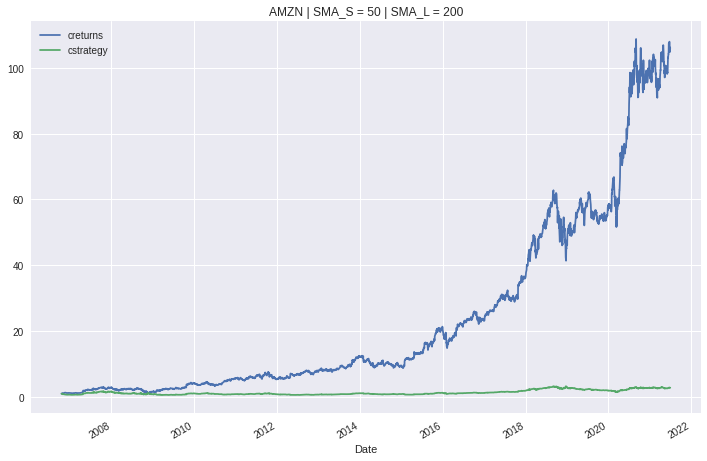

In [ ]:
tester.plot_results()

## Strategy Optimization

In [ ]:
tester.set_parameters(25, 150)

In [ ]:
tester.test_strategy()[0]

5.80473

In [ ]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
        
    def get_data(self):
        stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
        start = dt.datetime.today()-dt.timedelta(6000)
        end = dt.datetime.today()
        cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
        ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

        # looping over tickers and creating a dataframe with close prices
        for ticker in stocks:
            cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
            

        # looping over tickers and storing OHLCV dataframe in dictionary
        for ticker in stocks:
            ohlcv_data[ticker] = yf.download(ticker,start,end)

        raw = cl_price
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        raw["SMA_S"] = raw["price"].rolling(self.SMA_S).mean() # add short sma
        raw["SMA_L"] = raw["price"].rolling(self.SMA_L).mean()
        self.data = raw
        return raw
    
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
        
        perf = data["cstrategy"].iloc[-1] # absolute performance
        outperf = perf - data["creturns"].iloc[-1] # outperformance 
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
            
    def optimize_parameters(self, SMA_S_range, SMA_L_range): 
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
        
        # test all combinations
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) # best performance
        opt = combinations[np.argmax(results)] # optimal parameters
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
                   
        # create a df with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
        many_results["performance"] = results
        self.results_overview = many_results
                            
        return opt, best_perf

In [ ]:
tester = SMABacktester("AMZN", 50, 200, "2006-01-01", "2021-06-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
tester.test_strategy()

(2.812418, -103.136451)

In [ ]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

((19, 229), 20.880575)

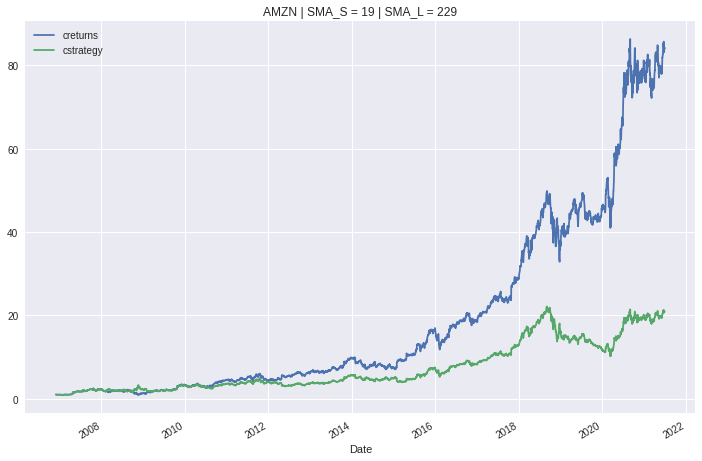

In [ ]:
tester.plot_results()

In [ ]:
tester.results_overview

,SMA_S,SMA_L,performance
0,10,100,6.076559
1,10,101,4.657389
2,10,102,4.179375
3,10,103,2.987025
4,10,104,2.460187
...,...,...,...
6075,49,247,9.033257
6076,49,248,9.736256
6077,49,249,9.294598
6078,49,250,9.162929


## Splitting get_data() and adding prepare_data() 

In [ ]:
class SMABacktester():
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None 
        self.get_data()
        self.prepare_data()
        
    def get_data(self):
        stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]
        start = dt.datetime.today()-dt.timedelta(6000)
        end = dt.datetime.today()
        cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
        ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

        # looping over tickers and creating a dataframe with close prices
        for ticker in stocks:
            cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
            

        # looping over tickers and storing OHLCV dataframe in dictionary
        for ticker in stocks:
            ohlcv_data[ticker] = yf.download(ticker,start,end)

        raw = cl_price
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        
    def prepare_data(self):
        data = self.data.copy()
        data["SMA_S"] = data["price"].rolling(self.SMA_S).mean()
        data["SMA_L"] = data["price"].rolling(self.SMA_L).mean()
        self.data = data
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
    
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
        
        # test all combinations
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) # best performance
        opt = combinations[np.argmax(results)] # optimal parameters
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
                   
        # create a df with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
        many_results["performance"] = results
        self.results_overview = many_results
                            
        return opt, best_perf

In [ ]:
tester = SMABacktester("AMZN", 50, 200, "2006-01-01", "2021-06-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
tester.data

,price,returns,SMA_S,SMA_L
Date,,,,
2006-01-03,47.580002,NaN,NaN,NaN
2006-01-04,47.250000,-0.006960,NaN,NaN
2006-01-05,47.650002,0.008430,NaN,NaN
2006-01-06,47.869999,0.004606,NaN,NaN
2006-01-09,47.080002,-0.016641,NaN,NaN
...,...,...,...,...
2021-06-24,3449.080078,-0.015746,3320.046797,3214.272039
2021-06-25,3401.459961,-0.013903,3320.494194,3214.936288
2021-06-28,3443.889893,0.012397,3321.383193,3216.280187


In [ ]:
tester.test_strategy()

(2.812418, -103.136451)

## String Representation & Docstrings

In [ ]:
tester

In [ ]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

In [ ]:
class SMABacktester():
    ''' Class for the vectorized backtesting of SMA-based trading strategies.
    '''
    
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        '''
        Parameters
        ----------
        symbol: str
            ticker symbol (instrument) to be backtested
        SMA_S: int
            moving window in bars (e.g. days) for shorter SMA
        SMA_L: int
            moving window in bars (e.g. days) for longer SMA
        start: str
            start date for data import
        end: str
            end date for data import
        '''
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None 
        self.get_data()
        self.prepare_data()
        
    def __repr__(self):
        return "SMABacktester(symbol = {}, SMA_S = {}, SMA_L = {}, start = {}, end = {})".format(self.symbol, self.SMA_S, self.SMA_L, self.start, self.end)
        
    def get_data(self):
        ''' Imports the data from yahoo finance (source can be changed).
        '''
        cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock
        ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker
        cl_price[self.symbol] = yf.download(self.symbol,self.start,self.end)["Adj Close"]
        raw = cl_price
        raw = raw[self.symbol].to_frame().dropna()
        raw = raw.loc[self.start:self.end].copy()
        raw.rename(columns={self.symbol: "price"}, inplace=True)
        raw["returns"] = np.log(raw / raw.shift(1))
        self.data = raw
        
    def prepare_data(self):
        '''Prepares the data for strategy backtesting (strategy-specific).
        '''
        data = self.data.copy()
        data["SMA_S"] = data["price"].rolling(self.SMA_S).mean()
        data["SMA_L"] = data["price"].rolling(self.SMA_L).mean()
        self.data = data
        
    def set_parameters(self, SMA_S = None, SMA_L = None):
        ''' Updates SMA parameters and the prepared dataset.
        '''
        if SMA_S is not None:
            self.SMA_S = SMA_S
            self.data["SMA_S"] = self.data["price"].rolling(self.SMA_S).mean()
        if SMA_L is not None:
            self.SMA_L = SMA_L
            self.data["SMA_L"] = self.data["price"].rolling(self.SMA_L).mean()
            
    def test_strategy(self):
        ''' Backtests the SMA-based trading strategy.
        '''
        data = self.data.copy().dropna()
        data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
        data["strategy"] = data["position"].shift(1) * data["returns"]
        data.dropna(inplace=True)
        data["creturns"] = data["returns"].cumsum().apply(np.exp)
        data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
        self.results = data
       
        perf = data["cstrategy"].iloc[-1] # absolute performance of the strategy
        outperf = perf - data["creturns"].iloc[-1] # out-/underperformance of strategy
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        ''' Plots the performance of the trading strategy and compares to "buy and hold".
        '''
        if self.results is None:
            print("Run test_strategy() first.")
        else:
            title = "{} | SMA_S = {} | SMA_L = {}".format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(12, 8))
    
    def optimize_parameters(self, SMA_S_range, SMA_L_range):
        ''' Finds the optimal strategy (global maximum) given the SMA parameter ranges.

        Parameters
        ----------
        SMA_S_range, SMA_L_range: tuple
            tuples of the form (start, end, step size)
        '''
        combinations = list(product(range(*SMA_S_range), range(*SMA_L_range)))
        
        # test all combinations
        results = []
        for comb in combinations:
            self.set_parameters(comb[0], comb[1])
            results.append(self.test_strategy()[0])
        
        best_perf = np.max(results) # best performance
        opt = combinations[np.argmax(results)] # optimal parameters
        
        # run/set the optimal strategy
        self.set_parameters(opt[0], opt[1])
        self.test_strategy()
                   
        # create a df with many results
        many_results =  pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
        many_results["performance"] = results
        self.results_overview = many_results
                            
        return opt, best_perf

In [ ]:
tester = SMABacktester("AMZN", 50, 200, "2006-01-01", "2021-06-30")

[*********************100%***********************]  1 of 1 completed


In [ ]:
tester

SMABacktester(symbol = AMZN, SMA_S = 50, SMA_L = 200, start = 2006-01-01, end = 2021-06-30)

In [ ]:
tester.optimize_parameters((10, 50, 1), (100, 252, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

((19, 229), 20.929011)